In [119]:
from record import *
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import find_peaks

In [120]:
t=Record('C:/Users/Lenovo/Desktop/Praktyka-2022/LSDWA-F/LSDWA-F_29-07-2019_12-13/F20190729120115.dat')

getting header


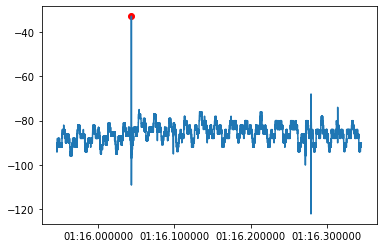

In [126]:
plt.plot(t.date[0:20000],t.chanel1[0:20000])

#peakind = signal.find_peaks_cwt(t.chanel1[0:20000], widths=0.5, min_length=1, noise_perc=1)
peakind, _ = find_peaks(t.chanel1[0:20000], threshold=20, distance=400)
if len(peakind)==0:
    peakind, _ = find_peaks(-t.chanel1[0:20000], threshold=20, distance=400)
    

for i in range(len(peakind)):
    plt.scatter(t.date[peakind[i]], t.chanel1[peakind[i]], c='r')
plt.show()
plt.show()

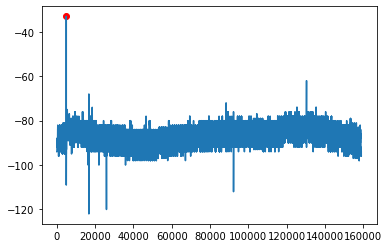

In [122]:
plt.plot(t.chanel1)
plt.scatter(peakind,t.chanel1[peakind], c='r')

In [118]:
trig=t.chanel1>1
trig
t.chanel1[trig]

array([], dtype=int32)